<h3>Mark : 18/20 </h3>


<h1>Subject</h1>

Go to Yahoo! Finance and choose a company that trades in the U.S. and has at least one call and one put option outstanding.
The call and the put shall be on the same underlying asset and have the same time to maturity. Choose the call so that it is in-the-money and has an exercise price that is <span>$10</span> higher than the exercise price of the put. Assume, for the sake of simplicity, that the stock will not pay any dividend until the maturity of the options and that the options are European.

<h1>Part 1</h1>
Obtain your own valuation of the PUT option using : 

1. The Binomial model
2. The Black-Scholes model
3. Monte Carlo simulation

Throughout your answer, clearly explain how you obtained your results. Do not worry too much if you fail to obtain a perfect match between the quote obtained on Yahoo! Finance and your estimations; rather, focus on explaining the logic that underpins your calculations.

<h1>Part 2</h1>
Assume that you are an investment bank and that you sold 50 of these puts and 200 of these calls. Recover the Greeks of the put, calculate the Greeks of the portfolio and get an approximation of how much the investment bank will earn or lose under each of the following scenarios

1. The share price rises by $0.50
2. The share price rises by $10
3. The volatility of the stock returns rises by 5%
4. One calendar day later
5. The interest rate rises by 1%
6. Scenarios 2 and 3 arise simultaneously.

How would you hedge scenario 6?


----

# Part 1 

Put & Call selected: We chose to work on options of the company Johnson & Johnson which trades in the U.S. (NYSE). 

The information on all Johnson & Johnson calls and puts can be found at :https://finance.yahoo.com/quote/JNJ/options?p=JNJ

According to Yahoo! Finance, the Johnson & Johnson’s put we chose had an exercise price of <span>$90</span> and a 1Y maturity ended on March 19, 2021. Its quoting price was $1.14.

We assume, for the sake of simplicity, that the option is European and that the stock is not going to pay any dividend till the maturity of the option.

Computing the elements needed to price the option :

* S0 = <span>$127,13</span>. S0 is the stock price on March 17, 2020 downloaded from Yahoo! Finance

* r = 0,262%. “r” was the risk free rate (of a 1 year Treasury Bill) taken from the website Investing.com on March 17th, 2020

* Time to maturity = 1 year.

* σ = 22,15% which is the volatility of the log returns annualized. 






## Question 1 : Valuation of a Put using three different methods

### A. Binomial model

In [1]:
import numpy as np
import math
import pandas as pd

In [2]:
# Inputs 

S0    = 127.13 
r     = 0.262/100
T     = 1 
K     = 90
sigma = 22.15/100

<h3>1. Pricing model according to the inputs</h3>

In [3]:
def binomial_tree(N, T, S0, sigma, r, K, call=True ,array_out=False):
    

    #N = number of binomial steps
    #T = Time to exercise in years 
    #S0 = initial stock price
    #sigma = volatility
    #r = risk free rate 
    #K = strike

    
    dt = T/N                         # Delta T 
    u  = np.exp(sigma*np.sqrt(dt))   #Upward Movement
    d  = 1/u                         #Downward Movement
    p  = (np.exp(r*dt)-d)/(u-d)      #Probability 

    
    #Price Tree
    price_tree=np.zeros([N+1, N+1])
    
    #Calculate the stock price at each node
    for i in range(N+1):
        for j in range(i+1):
            price_tree[j,i]=S0*(d**j)*(u**(i-j))
            
    
    #Option value at maturity 
    option = np.zeros([N+1, N+1])
    if call:
        option[:,N]=np.maximum(np.zeros(N+1), price_tree[:, N] -K)
    else:
        option[:,N]=np.maximum(np.zeros(N+1), K-price_tree[:, N])
        
        
    #Calculate the Option price at t=0
    for i in np.arange(N-1, -1, -1):
        for j in np.arange(0, i+1):
            option[j,i]=np.exp(-r*dt)*(p*option[j, i+1]+(1-p)*option[j+1, i+1])
            
           
    
    #Return the value        
    if array_out:
        return [option[0,0],price_tree, option] #If we want the price + the tree
    else:
        return option[0,0]   

In [4]:
binomial_10_steps=binomial_tree(10, T, S0, sigma, r, K, call=False, array_out=False)

print('The price of the Put using the binomial model with 10 steps is $ ' + str(np.round(binomial_10_steps,5)))

The price of the Put using the binomial model with 10 steps is $ 0.59396


In [5]:
binomial_500_steps=binomial_tree(500, T, S0, sigma, r, K, call=False, array_out=False)

print('The price of the Put using the binomial model with 500 steps is $ ' + str(np.round(binomial_500_steps,5)))

The price of the Put using the binomial model with 500 steps is $ 0.58597


<h3>2. Output of a Binomial Tree </h3>

In [6]:
def tree(N, T, S0, sigma, r, K, call=True,option_frame=True):
    
    
    #N = number of binomial steps
    #T = Time to exercise in years 
    #S0 = initial stock price
    #sigma = volatility
    #r = risk free rate 
    #K = strike
    
    
    dt= T/N                         #Delta T
    u = np.exp(sigma*np.sqrt(dt))   #Upward Movement
    d = 1/u                         #Downward Movement
    p = (np.exp(r*dt)-d)/(u-d)      #Probability 
    
    #Price Tree
    price_tree=np.zeros([N+1, N+1])
    
    
    #Calculate the stock price at each node
    for i in range(N+1):
        for j in range(i+1):
            price_tree[j,i]=S0*(d**j)*(u**(i-j))
            
            
    #Option value at maturity 
    option = np.zeros([N+1, N+1])
    if call:
        option[:,N]=np.maximum(np.zeros(N+1), price_tree[:, N] -K)
    else:
        option[:,N]=np.maximum(np.zeros(N+1), K-price_tree[:, N])
        
        
    #Calculate the Option price at t=0
    for i in np.arange(N-1, -1, -1):
        for j in np.arange(0, i+1):
            option[j,i]=np.exp(-r*dt)*(p*option[j, i+1]+(1-p)*option[j+1, i+1])
    
    
    #Option Tree
    option_tree=pd.DataFrame(data=option[0:])

    
    #price_tree=price_tree[:,-1].reshape(11,1)
    price_tree=pd.DataFrame(data=price_tree[0:])
    
    
    #Return the value  
    if option_frame:
        return option_tree #If we want the price + the tree
    else:
        return price_tree
        


Simulation Stock Prices with the Binomial Tree

In [7]:
tree(10, T, S0, sigma, r, K, call=False,option_frame=False)

,0,1,2,3,4,5,6,7,8,9,10
0,127.13,136.354026,146.247309,156.858408,168.239403,180.446157,193.538583,207.580940,222.642153,238.796145,256.122203
1,0.00,118.529958,127.130000,136.354026,146.247309,156.858408,168.239403,180.446157,193.538583,207.580940,222.642153
2,0.00,0.000000,110.511688,118.529958,127.130000,136.354026,146.247309,156.858408,168.239403,180.446157,193.538583
3,0.00,0.000000,0.000000,103.035834,110.511688,118.529958,127.130000,136.354026,146.247309,156.858408,168.239403
4,0.00,0.000000,0.000000,0.000000,96.065705,103.035834,110.511688,118.529958,127.130000,136.354026,146.247309
5,0.00,0.000000,0.000000,0.000000,0.000000,89.567088,96.065705,103.035834,110.511688,118.529958,127.130000
6,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,83.508088,89.567088,96.065705,103.035834,110.511688
7,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.858964,83.508088,89.567088,96.065705
8,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.591990,77.858964,83.508088
9,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.681314,72.591990


Simulation Put Prices with the Binomial Tree

In [8]:
tree(10, T, S0, sigma, r, K, call=False,option_frame=True)

,0,1,2,3,4,5,6,7,8,9,10
0,0.593959,0.185844,0.032374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.977626,0.330100,0.062802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.586381,0.581356,0.121827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,2.531263,1.013314,0.236328,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,3.958445,1.743695,0.458445,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,6.040897,2.951888,0.889321,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.945646,4.890874,1.725162,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.759069,7.867091,3.346580,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.360862,12.117459,6.491912
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.295109,17.408010


### B. Black-Scholes Model

In [9]:
import scipy.stats as si
from sympy.stats import Normal, cdf

In [10]:
def black_scholes(S, r, K, sigma, T, call=True):

    #S: spot price
    #r: risk free rate
    #K: strike price
    #sigma: volatility of underlying asset
    #T: time to maturity

    d1 = (np.log(S/K)+(r+ 0.5 * sigma ** 2)*T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call:
        option = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
        
    else:
        option = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    
    
    
    return option

In [11]:
Black_Scholes=black_scholes(S=127.13, r=0.26/100, K=90, sigma=22.15/100, T=1, call=False)

print('The price of the Put using the Black & Scholes method is $ ' + str(np.round(Black_Scholes,5)))

The price of the Put using the Black & Scholes method is $ 0.58589


### C. Monte Carlo simulation

In [12]:
def Monte_carlo(N, S0, K, T, r, sigma, call=True):
    
    z = np.random.standard_normal(N)
    
    #Price at maturity
    St = S0 * np.exp(( r - 0.5 * sigma ** 2) + math.sqrt(T) * sigma * z)
    
    #Option price at maturity
    if call:
        option_maturity = np.maximum(( St - K ), 0)
    else:
        option_maturity = np.maximum(( K - St ), 0)
        
    
    #Price option at t=0
    option = math.exp( - r * T) * np.average(option_maturity)
        
    return option 


In [13]:
Monte_carlo = Monte_carlo(300000, S0, K, T, r, sigma, call=False)

print('The price of the Put using the Monte Carlo method is $ ' + str(np.round(Monte_carlo,5)))

The price of the Put using the Monte Carlo method is $ 0.58693


## Conclusion Part 1

In [14]:
df = pd.DataFrame({'Name': ['Binomial 10 Steps','Binomial 500 Steps','Monte Carlo','Black&Scholes','Yahoo Finance'],
                  'Price of the Put':[binomial_10_steps,binomial_500_steps,Monte_carlo,Black_Scholes,1.14]})
df = df.set_index('Name')

df

,Price of the Put
Name,
Binomial 10 Steps,0.593959
Binomial 500 Steps,0.585965
Monte Carlo,0.586933
Black&Scholes,0.585890
Yahoo Finance,1.140000


Binomial Method vs Black & Scholes Method

Regarding the Binomial method with 10 steps we found a price of $0.593959 which is a little bit different from what we found with the Black & Scholes method. The difference is due to the number of steps that we have on the Binomial Model. Hence if the number of steps tend to + ∞ the price of the Binomial will tend to the Black & Scholes price. That worked just fine: with 500 steps and a value of $0.585965

Monte Carlo Method vs Black & Scholes Method

According to the Monte Carlo Method with 300 000 iterations, we found a price of $0.5855 which is very close to the Black & Scholes Model. We can explain this by the fact the both model are the same and if we keep increasing the number of iteration, it will converge to the Black & Scholes price. (analytical solution of the expected value for B&S and empirical one for Monte Carlo simulation)

Black & Scholes Method vs Yahoo Finance

The $1.14 price from Yahoo finance differs from ours.
According to the data that we found on Yahoo Finance, we can notice that there is a huge difference between the B&S Model and the data. We have assumptions that can explain the difference :
- If we consider that the Bank used the B&S model, it could be a difference on the inputs such as the interest rate or the volatility. That could lead to a difference in price.
- We could also assume that Banks use their own model that is different from Black & Scholes.
- We didn't take into account some variables such as the dividend that can also change the value of the option.

## Question 2 : What will happen with these scenario ?

For the second part, we decided to take calls and puts closer to the price of the underlying in order to see the impact of the Greeks, which are more significant in that case. 

That is why, we took :

1. Calls with a strike at <space>$125</space>

2. Puts with a strike at <space> $115 </space> 
3. All with a one month maturity (so T=1/12)

As the price of the underlying was $127.13, you will find below the results of all the Greeks on the call and the put according to the Black & Scholes model :

In [15]:
# New Inputs
T = 1/12
K_call=125
K_put=115

<h2>The Greeks</h2>

In [16]:
def Greeks(sigma,r,S0,T,K_call,K_put,call=True):
    
    if call:
    
        d1          = (np.log( S0 / K_call) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
        d2          = d1 - sigma * np.sqrt(T)
        
        Call_price  = S0 * np.exp(- r * T) * si.norm.cdf(d1, 0, 1) - K_call * np.exp(- r * T) * si.norm.cdf(d2,0,1)
        
        variable    = 1 / np.sqrt(2 * math.pi) * np.exp(- 0.5 * d1 ** 2 )

        delta_call  = si.norm.cdf(d1, 0, 1)
        gamma_call  = variable /(S0 * sigma * np.sqrt(T))
        theta_call  = (- (S0 * variable * sigma) / (2 * np.sqrt(T)) - r * K_call * np.exp(- r * T) * si.norm.cdf(d2, 0.0, 1.0))/365
        vega_call   = (S0 * np.sqrt(T) * variable)/100
        rho_call    = (K_call * T * np.exp(-r * T) * si.norm.cdf(d2, 0, 1))/100
        
        df = pd.DataFrame({'Variable':['Call Price','Delta','Gamma','Theta','Rho','Vega'],
                          'Value':[Call_price,delta_call,gamma_call,theta_call,rho_call,vega_call]
                          
                          })
        
        return df.set_index('Variable')
    
    else :
        
        d1          = (np.log( S0 / K_put) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
        d2          = d1 - sigma * np.sqrt(T)
        
        Put_price   = K_put * np.exp(-r * T) * si.norm.cdf(-d2 , 0 ,1) - S0 * np.exp(- r * T) * si.norm.cdf(-d1,0,1)
    
        variable    = 1 / np.sqrt(2 * math.pi) * np.exp(- 0.5 * d1 ** 2 )

        delta_put   = si.norm.cdf(d1, 0, 1) - 1
        gamma_put   = variable /(S0 * sigma * np.sqrt(T))
        theta_put   = (- (S0 * variable * sigma) / (2 * np.sqrt(T)) + r * K_put * np.exp(- r * T) * si.norm.cdf(-d2, 0.0, 1.0))/365
        vega_put    = (S0 * np.sqrt(T) * variable)/100
        rho_put     = -(K_put * T * np.exp(-r * T) * si.norm.cdf(-d2, 0, 1))/100
        
        df = pd.DataFrame({'Variable':['Put Price','Delta','Gamma','Theta','Rho','Vega'],
                          'Value':[Put_price,delta_put,gamma_put,theta_put,rho_put,vega_put]
                          
                          })
        
        return df.set_index('Variable')


In [17]:
call_ptf = Greeks(sigma, r, S0, T, K_call, K_put, call=True)
put_ptf = Greeks(sigma, r, S0, T, K_call, K_put, call=False)
print(call_ptf)
print(put_ptf)

               Value
Variable            
Call Price  4.390831
Delta       0.617772
Gamma       0.046923
Theta      -0.051501
Rho         0.061774
Vega        0.139982
              Value
Variable           
Put Price  0.193451
Delta     -0.054394
Gamma      0.013565
Theta     -0.014684
Rho       -0.005923
Vega       0.040469


This table represents the Greeks and the prices (B&S method) of 1 Call and 1 Put with the new inputs. We will use those values to compute the Greeks of the overall portfolio which is composed of writing 50 puts and writing 200 calls.  

<h2>Portfolio Creation</h2>

In [18]:
call = -200
put = -50

In [19]:
def portfolio(nb_put,nb_call,selling_put=True,selling_call=True):
    
    #Computing Greeks and the Value according to the number of Puts/Call
    
    if selling_put:
        put_total  = - nb_put  * put_ptf
    else:
        put_total  = nb_put  * put_ptf
    
    if selling_call:
        call_total = - nb_call * call_ptf
    else:
        call_total = nb_call * call_ptf
        
    #Merge both DataFrames and creating a column 'Total Portfolio' with the total position 
    portfolio  = pd.concat([put_total, call_total.reindex(put_total.index)], axis=1)

    portfolio  = portfolio.rename({'Put Price': 'Value ($)'})
    portfolio.columns = ['Put','Call']
    
    if selling_call:
        portfolio.iloc[0,1]= - nb_call * call_ptf.loc['Call Price','Value']
    else:
        portfolio.iloc[0,1]= nb_call * call_ptf.loc['Call Price','Value']
        
    portfolio['Total Portfolio']= portfolio['Put'] + portfolio['Call']
    
    return portfolio
    

In [20]:
portfolio = portfolio(nb_put=50,nb_call=200,selling_put=True,selling_call=True)
portfolio

,Put,Call,Total Portfolio
Variable,,,
Value ($),-9.672555,-878.166246,-887.838802
Delta,2.719712,-123.554343,-120.834631
Gamma,-0.678272,-9.384548,-10.062820
Theta,0.734207,10.300173,11.034380
Rho,0.296128,-12.354890,-12.058762
Vega,-2.023451,-27.996383,-30.019834


As we now have the Greeks, we will be able to compute the impact of the change in our variables on our Portfolio. This impact is seen below according to different scenarios. 

### Scénario 1 : The share price rises by $0.50

In [21]:
def impact_portfolio(stock_change,vol_change,time_change,rate_change):
    
    dportfolio_stock = portfolio.loc['Delta','Total Portfolio'] * stock_change + 0.5 * portfolio.loc['Gamma','Total Portfolio'] * stock_change ** 2
    
    dportfolio_vol   = portfolio.loc['Vega','Total Portfolio'] * vol_change
    
    dportfolio_time  = portfolio.loc['Theta','Total Portfolio'] * time_change

    dportfolio_rate  = portfolio.loc['Rho','Total Portfolio'] * rate_change
    
    impact_ptf = dportfolio_stock + dportfolio_vol + dportfolio_time + dportfolio_rate
    
    print('A change of $' + str(np.round(stock_change,2)) + ' of the share price provok a change of $ '+ str(np.round(dportfolio_stock,2)) +' on the portfolio')
    print()
    print('A change of '+ str(np.round(vol_change,2)) +'% of the volatility provok a change of $ '+ str(np.round(dportfolio_vol,2)) + ' on the portfolio')
    print()
    print('A change of '+ str(np.round(time_change,2)) +' of the time provok a change of $ '+ str(np.round(dportfolio_time,2)) + ' on the portfolio')
    print()
    print('A change of '+ str(np.round(rate_change,2)) + '% of the rate provok a change of $ '+ str(np.round(dportfolio_rate,2)) + ' on the portfolio')
    print()
    print('The total change is $ ' + str(np.round(impact_ptf,2)) + ' on the portfolio')
    

In [22]:
impact_portfolio(stock_change=0.5,vol_change=0,time_change=0,rate_change=0)

A change of $0.5 of the share price provok a change of $ -61.68 on the portfolio

A change of 0% of the volatility provok a change of $ -0.0 on the portfolio

A change of 0 of the time provok a change of $ 0.0 on the portfolio

A change of 0% of the rate provok a change of $ -0.0 on the portfolio

The total change is $ -61.68 on the portfolio


### Scénario 2 : The share price rises by $10

In [23]:
impact_portfolio(stock_change=10,vol_change=0,time_change=0,rate_change=0)

A change of $10 of the share price provok a change of $ -1711.49 on the portfolio

A change of 0% of the volatility provok a change of $ -0.0 on the portfolio

A change of 0 of the time provok a change of $ 0.0 on the portfolio

A change of 0% of the rate provok a change of $ -0.0 on the portfolio

The total change is $ -1711.49 on the portfolio


### Scénario 3 : The volatility of the stock returns rises by 5%

In [24]:
impact_portfolio(stock_change=0,vol_change=5,time_change=0,rate_change=0)

A change of $0 of the share price provok a change of $ -0.0 on the portfolio

A change of 5% of the volatility provok a change of $ -150.1 on the portfolio

A change of 0 of the time provok a change of $ 0.0 on the portfolio

A change of 0% of the rate provok a change of $ -0.0 on the portfolio

The total change is $ -150.1 on the portfolio


### Scénario 4: One calendar day later

In [25]:
impact_portfolio(stock_change=0,vol_change=0,time_change=1,rate_change=0)

A change of $0 of the share price provok a change of $ -0.0 on the portfolio

A change of 0% of the volatility provok a change of $ -0.0 on the portfolio

A change of 1 of the time provok a change of $ 11.03 on the portfolio

A change of 0% of the rate provok a change of $ -0.0 on the portfolio

The total change is $ 11.03 on the portfolio


### Scénario 5 :The interest rate rises by 1%

In [26]:
impact_portfolio(stock_change=0,vol_change=0,time_change=0,rate_change=1)

A change of $0 of the share price provok a change of $ -0.0 on the portfolio

A change of 0% of the volatility provok a change of $ -0.0 on the portfolio

A change of 0 of the time provok a change of $ 0.0 on the portfolio

A change of 1% of the rate provok a change of $ -12.06 on the portfolio

The total change is $ -12.06 on the portfolio


### Scénario 6 : Scenarios 2 and 3 arise simultaneously

In [27]:
impact_portfolio(stock_change=10,vol_change=5,time_change=0,rate_change=0)

A change of $10 of the share price provok a change of $ -1711.49 on the portfolio

A change of 5% of the volatility provok a change of $ -150.1 on the portfolio

A change of 0 of the time provok a change of $ 0.0 on the portfolio

A change of 0% of the rate provok a change of $ -0.0 on the portfolio

The total change is $ -1861.59 on the portfolio


### How would you hedge scenario 6 ?

In [28]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=100

First, we will create a graph that represents a change in the Portfolio Value according to both change in Volatility and Spot Price

<IPython.core.display.Javascript object>


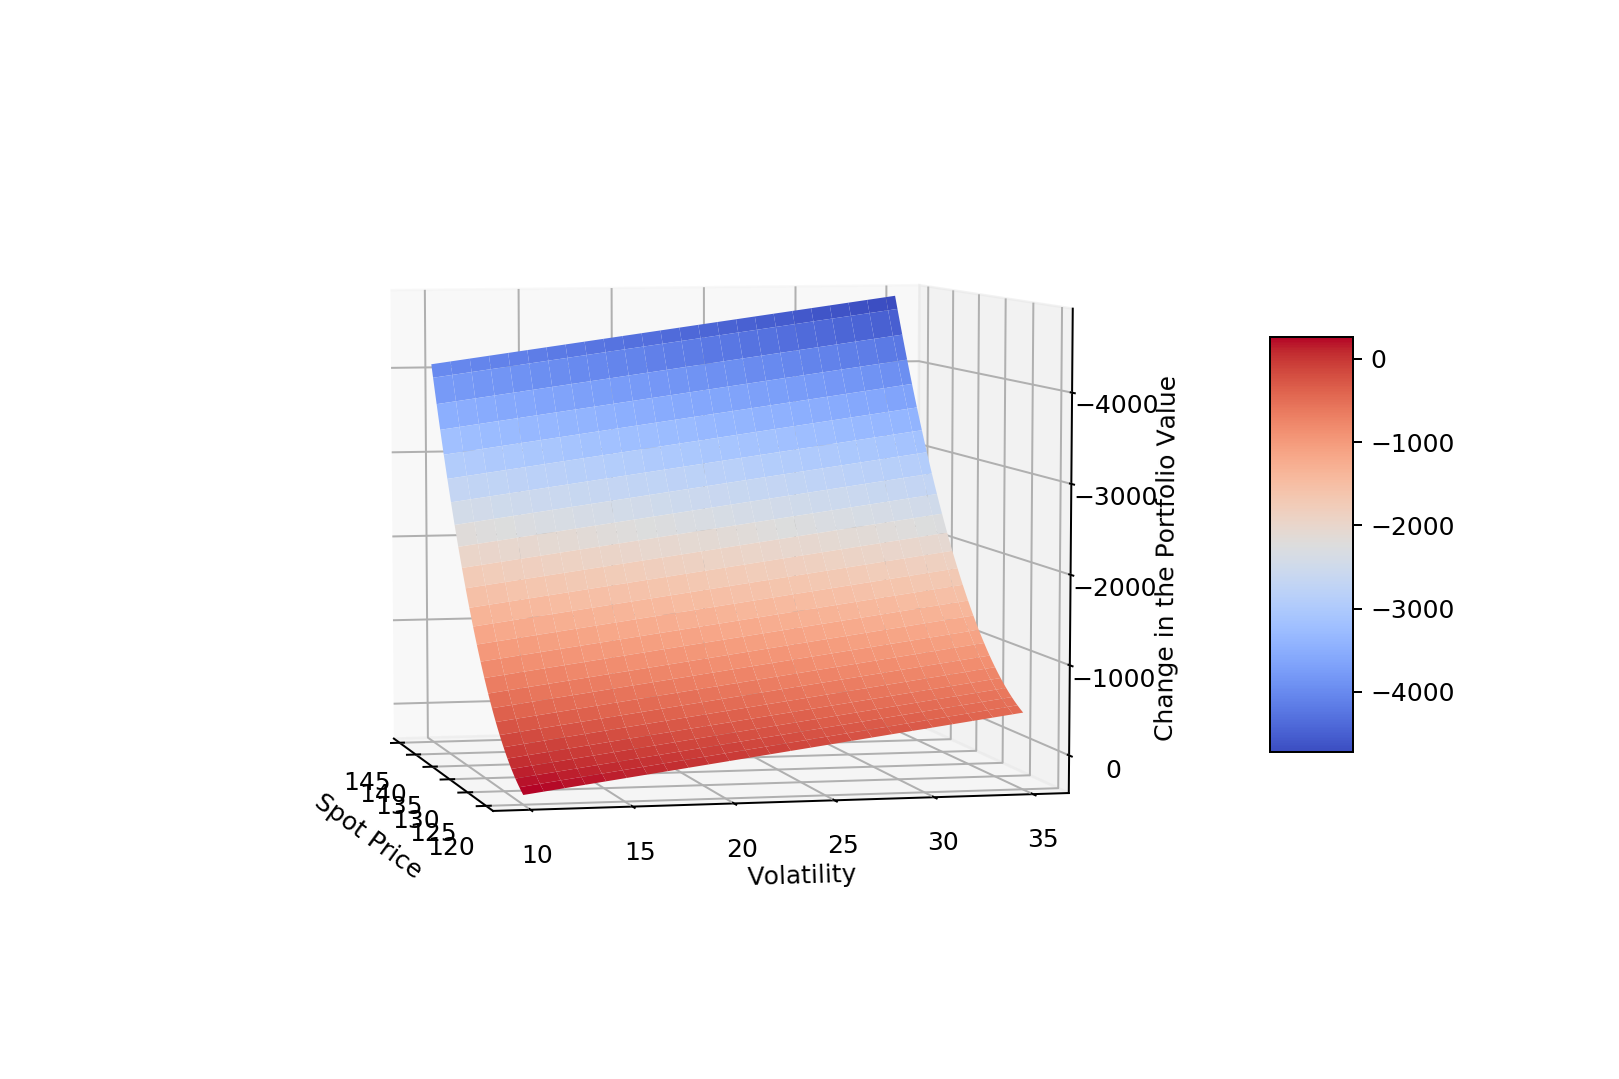

In [29]:
delta = portfolio.loc['Delta','Total Portfolio']
gamma = portfolio.loc['Gamma','Total Portfolio']
vega = portfolio.loc['Vega','Total Portfolio']

x = np.linspace(120,145)
y = np.linspace(10,35)
x, y = np.meshgrid(x, y)
z = delta * (x - S0) + 0.5 * gamma * ((x - S0) ** 2) + vega * (y - sigma)

fig = plt.figure(figsize=(9, 6)) 
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5,antialiased=True)

ax.set_xlabel('Spot Price') 
ax.set_ylabel('Volatility') 
ax.set_zlabel('Change in the Portfolio Value')

fig.colorbar(surf, shrink=0.5, aspect=5)


In order to have a correct hedge of scenario 6, our portfolio has to be Delta, Gamma and Vega neutral. 

In order to do that correctly, we need to compute w1 and w2 ( w1 being the quantities of calls and w2 the quantities of puts ) that satisfy the following system:

$$\Gamma_{Portfolio} + \Gamma_{Call} w_{1} + \Gamma_{Put} w_{2} = 0  $$
$$\upsilon_{Portfolio} + \upsilon_{Call} w_{1} + \upsilon_{Put} w_{2} = 0   $$

You will find below a code that solve the system to make the Portfolio Gamma and Vega neutral and then will also make it Delta neutral : 

<h2>Find the number of Options & Stock to Sell/Buy for Delta, Gamma and Vega Hedging</h2>

In [30]:
delta_call = call_ptf.loc['Delta','Value']
delta_put = put_ptf.loc['Delta','Value']

gamma_call = call_ptf.loc['Gamma','Value']
gamma_put  = put_ptf.loc['Gamma','Value']

vega_call  = call_ptf.loc['Vega','Value']
vega_put   = put_ptf.loc['Vega','Value']

In [31]:
def weight_call_put(delta,delta_call,delta_put,gamma,gamma_call,gamma_put,vega,vega_call,vega_put):
    # define matrix A
    A = np.array([[gamma_call, gamma_put],[vega_call, vega_put]]) 
    
    #define matrix B
    B = np.array([-gamma, -vega]) 
    
    #A corresponding to the number of Calls and B corresponding to the number of Puts that we have to buy/sell
    solution = np.linalg.solve(A, B )
    
    return solution

def weight_stock(delta,delta_call,delta_put,gamma,gamma_call,gamma_put,vega,vega_call,vega_put):
        # define matrix A
    A = np.array([[gamma_call, gamma_put],[vega_call, vega_put]]) 
    
    #define matrix B
    B = np.array([-gamma, -vega]) 
    
    #A corresponding to the number of Calls and B corresponding to the number of Puts that we have to buy/sell
    solution = np.linalg.solve(A, B )
    
    #Computing the new delta which is equivalent to the number of stocks to buy/sell to make the ptf delta neutral
    new_delta = delta + solution[0] * delta_call + solution[1] * delta_put
    
    return new_delta
    

def hedging(delta,delta_call,delta_put,gamma,gamma_call,gamma_put,vega,vega_call,vega_put):
    
    # define matrix A
    A = np.array([[gamma_call, gamma_put],[vega_call, vega_put]]) 
    
    #define matrix B
    B = np.array([-gamma, -vega]) 
    
    #A corresponding to the number of Calls and B corresponding to the number of Puts that we have to buy/sell
    solution = np.linalg.solve(A, B )
    
    #Computing the new delta which is equivalent to the number of stocks to buy/sell to make the ptf delta neutral
    new_delta = delta + solution[0] * delta_call + solution[1] * delta_put
    
    if solution[0] > 0:
        print('Buy ' + str(solution[0]) + ' Calls')
    
    else:
        print('Sell ' + str(solution[0]) + ' Calls')
        
    
    if solution[1] > 0:
        print('Buy ' + str(solution[1]) + ' Puts')
        
    else:
        print('Sell ' + str(solution[1]) + ' Puts')
        
    if new_delta>0:
        print('Buy ' + str(new_delta) + ' Stocks')
        
    else:
        print('Buy ' + str(new_delta) + ' Stocks')
    
    print('This strategy will make your portfolio Delta, Gamma and Vega hedged')


    solution = np.linalg.solve(A, B )
    new_delta = delta + solution[0] * delta_call + solution[1] * delta_put

In [32]:
solution = weight_call_put(delta,delta_call,delta_put,gamma,gamma_call,gamma_put,vega,vega_call,vega_put)
new_delta = weight_stock(delta,delta_call,delta_put,gamma,gamma_call,gamma_put,vega,vega_call,vega_put)
hedging(delta,delta_call,delta_put,gamma,gamma_call,gamma_put,vega,vega_call,vega_put)

Buy 983.6890680303909 Calls
Sell -2660.772126377481 Puts
Buy 631.5913256380652 Stocks
This strategy will make your portfolio Delta, Gamma and Vega hedged


In order to have a proper hedge on scenario 6, we have to buy 983 Calls, sell 2660 Puts and buy 631 stocks. Now we will compute the new Greeks of our portfolio according to the new inputs

<h2>Creation of the New Portfolio</h2>

In [33]:
#Compute the new numbers of asset hold in the portfolio
new_call  = call + solution[0]
new_put   = put + solution[1]
new_stock = new_delta

#Price of the call and the put 
call_price = call_ptf.loc['Call Price','Value']
put_price = put_ptf.loc['Put Price','Value']

In [34]:
#Creating the new portfolio with the new Greeks 
new_put_total   = new_put * put_ptf    #Value with the total number of puts 
new_call_total  = new_call * call_ptf #Value with the total number of calls 

#Merge both Dataframes
new_portfolio   = pd.concat([new_put_total, new_call_total.reindex(new_put_total.index)], axis=1)
new_portfolio   = new_portfolio.rename({'Put Price': 'Value ($)'})
new_portfolio.columns = ['Put','Call']

#Add the total value of Call in the Portfolio
new_portfolio.iloc[0,1]=new_call * call_ptf.loc['Call Price','Value']

#Creating the new columns total portfolio
new_portfolio['Total Portfolio']= new_portfolio['Put'] + new_portfolio['Call'] 

#Adding the number of stock bought the change the total Delta of the Portfolio 
new_portfolio.loc['Delta','Total Portfolio'] = new_portfolio.loc['Delta','Total Portfolio'] - new_delta

#Round the values
new_portfolio = np.round(new_portfolio,2)


In [35]:
new_portfolio

,Put,Call,Total Portfolio
Variable,,,
Value ($),-524.40,3441.05,2916.64
Delta,147.45,484.14,0.00
Gamma,-36.77,36.77,0.00
Theta,39.81,-40.36,-0.56
Rho,16.05,48.41,64.47
Vega,-109.70,109.70,0.00


As you can see, the portfolio is Delta, Gamma and Vega Hedged. Hence the strategy was correct.